### Import libraries

In [1]:
import math
import numpy as np
import pandas as pd
from data.utils import rgb2binary
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from PIL import Image

from rrt import RRT

### Example of `ROI` generation

In [2]:
data_path = 'data/dataset/'

map0 = np.array(Image.open('data/dataset/maps/map_0.png').convert('RGB'))
map0 = rgb2binary(map0)


map0_task0 = np.array(Image.open('data/dataset/tasks/map_0/task_0.png').convert('RGB'))
map0_task0 = rgb2binary(map0_task0)

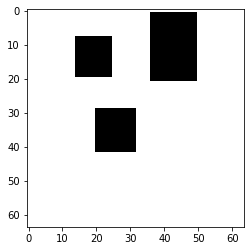

In [3]:
plt.imshow(map0)

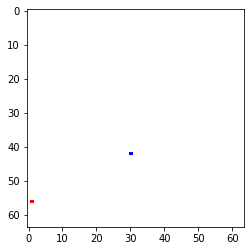

In [4]:
plt.imshow(map0_task0)

In [5]:
df = pd.read_csv('data/dataset/tasks/map_0.csv')
df.head()

,istart,jstart,igoal,jgoal,euclid
0,42,30,56,1,32.202484
1,2,12,34,62,59.363288
2,15,56,40,38,30.805844
3,55,59,55,1,58.000000
4,20,1,60,33,51.224994


In [6]:
start = (df.istart[0], df.jstart[0])
goal = (df.igoal[0], df.jgoal[0])
grid = map0.copy()

In [7]:
n_runs = 50
model = RRT()

colors = {'start': np.array([0, 0, 1]),
          'goal': np.array([1, 0, 0]),
          'roi': np.array([0, 1, 0]),
          'open': np.array([1, 1, 0])}

In [8]:
roi = np.ones(map0.shape)
opens=[]

for it in tqdm(range(n_runs)):
    path = model.search(map0[..., 1], start, goal)
#     opens += model.OPEN
#     opens = [(int(i[0]), int(i[1])) for i in opens]
# for i in opens:
#     grid[i[0], i[1], :] = colors['open']
    for x in path:
        grid[x[0], x[1], :] = colors['roi']
        roi[x[0], x[1], :] = colors['roi']
        
grid[start[0], start[1], :] = colors['start']
grid[goal[0], goal[1], :] = colors['goal']

  0%|          | 0/50 [00:00<?, ?it/s]

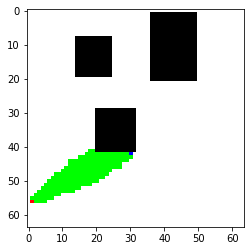

In [8]:
plt.imshow(grid)

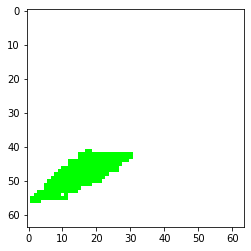

In [10]:
plt.imshow(roi)

In [39]:
from data.utils import ROIGenerator

### Maps from `map_0` to `map_39` included - `Azamat`
### Maps from `map_40` to `map_69` included - `Alina`
### Maps from `map_70` to `map_99` included - `Timofey`

In [40]:
m_name = 'map_9'
n_tasks=100
n_runs=50

algorithm = RRT()
roi_generator = ROIGenerator(model=algorithm)
roi_generator.set_parameters(m_name=m_name,
                             m_path='data/dataset/maps/',
                             t_path='data/dataset/tasks/')

In [41]:
grids, rois = roi_generator.generate(n_runs=n_runs, n_tasks=n_tasks)

  0%|          | 0/100 [00:00<?, ?it/s]